In [1]:
%matplotlib inline

import time

import keras
from sklearn.model_selection import StratifiedKFold, KFold
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model

import subprocess as sp
import numpy as np

from models import ZMlpClassifier, ZCnnClassifier
from models import PatchedKerasClassifier

from patch._sklearn import cross_val_score, get_learning_curve
from utils import load_keras_dataset, concat_sample

from utils import visualize_feature, down_sampling
from callbacks import FeedforwardHistory
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.ioff()
# plt.rcParams['font.family'] = 'Droid Sans Fallback'   # support zh-chinese


Using TensorFlow backend.


# MINST

In [20]:
dataset_name = 'mnist'
(x_train, y_train), (x_test, y_test), (input_shape, num_classes) = load_keras_dataset(dataset_name, model_type='mlp')
x_all, y_all = concat_sample((x_train, x_test), (y_train, y_test))

x_train shape: (60000, 784)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [ ]:
%%time

penalty = (0.0, 0.1)
sigma = (0.0, 0.03)
colors = (('purple', 'red'), ('green', 'blue'))
markers = (('o--', 'o--'), ('o-', 'o-'))
epochs = 10
latent_dim = 32
activation = 'selu'
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

fig = plt.figure(figsize=(18, 10))
ax = fig.gca()

build_fn = ZMlpClassifier(input_shape, num_classes,
                          activation=activation, latent_dim=latent_dim,
                          vi_penalty=penalty[0], sigma=sigma[0])

estimator = PatchedKerasClassifier(build_fn=build_fn, epochs=epochs, verbose=0)
_, ax = get_learning_curve(ax, estimator,
                           np.linspace(0.1, 1.0, 5),
                           x_all, dict(classifier=y_all, decoder=x_all), cv=cv, marker_pair=markers[0],
                           label_meta='p: {}/s: {}'.format(penalty[0], sigma[0]), color_pair=colors[0])


build_fn = ZMlpClassifier(input_shape, num_classes,
                          activation=activation, latent_dim=latent_dim,
                          vi_penalty=penalty[1], sigma=sigma[1])

estimator = PatchedKerasClassifier(build_fn=build_fn, epochs=epochs, verbose=0)
_, ax = get_learning_curve(ax, estimator,
                           np.linspace(0.1, 1.0, 5),
                           x_all, dict(classifier=y_all, decoder=x_all), cv=cv, marker_pair=markers[1],
                           label_meta='p: {}/s: {}'.format(penalty[1], sigma[1]), color_pair=colors[1])

ax.set_title('Learning Curve\n{}:{}'.format(dataset_name, build_fn.__name__))
plt.close(fig)


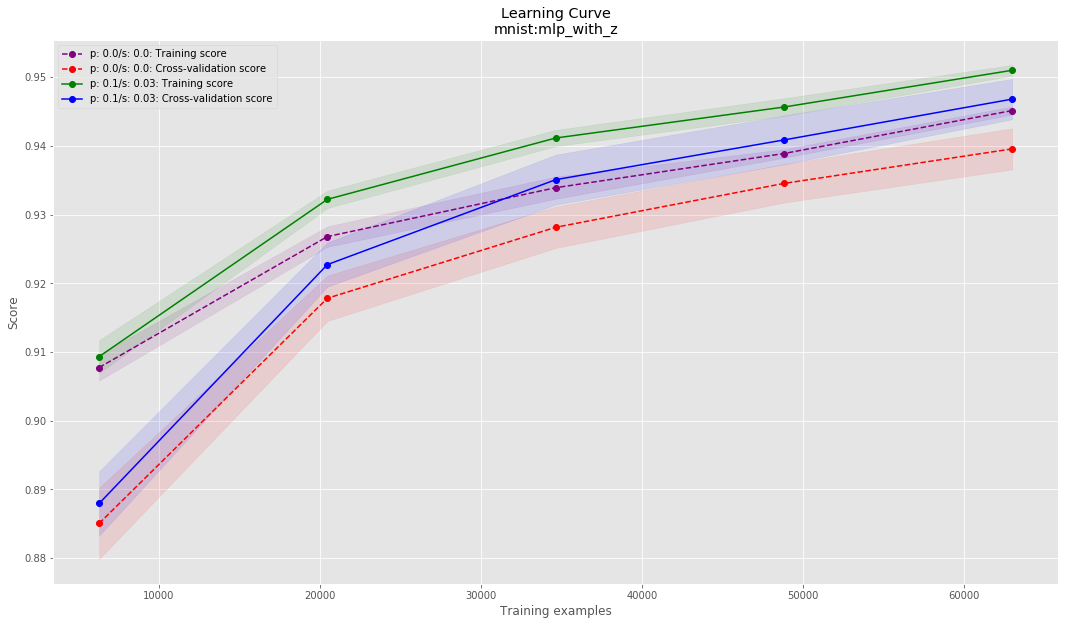

In [6]:
# fig.savefig('data/{}/learning_curve.{}.png'.format(dataset_name, build_fn.__name__))
display(fig)